In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pandas_profiling as pp

In [5]:
import seaborn as sns

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv("train_age_dataset.csv")

In [8]:
dft=pd.read_csv("test_age_dataset.csv")

In [9]:
X=df.drop('age_group',axis=1)
Y=df['age_group']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [11]:
df.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [12]:
df.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [13]:
df.gender.value_counts()

1    384728
2    104149
Name: gender, dtype: int64

<AxesSubplot:ylabel='age_group'>

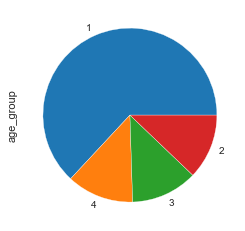

In [14]:
%matplotlib inline
df.age_group.value_counts().plot(kind='pie')

In [15]:
df2=df.copy()

In [16]:
for i in range(len(df2.age_group)):
    while (df2['gender'][i]==2):
        df2['gender'][i]=0
9        

F:\anCONDA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


9

In [17]:
df2['gender']

0         1
1         0
2         1
3         1
4         0
         ..
488872    0
488873    1
488874    1
488875    1
488876    1
Name: gender, Length: 488877, dtype: int64

In [18]:
df2['gender'].value_counts()

1    384728
0    104149
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

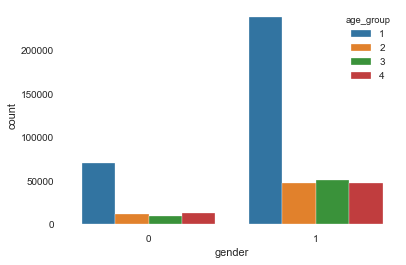

In [19]:
 sns.countplot(x=df2.gender,hue=df2.age_group)

In [20]:
df2.groupby(df2.gender).age_group.value_counts()

gender  age_group
0       1             70235
        4             12805
        2             11712
        3              9397
1       1            238080
        3             51007
        4             47998
        2             47643
Name: age_group, dtype: int64

In [21]:
pd.options.display.max_columns=50

In [22]:
df2.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,271605.981815,4.236096e+07,1.975382,0.786963,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,156808.138002,1.821664e+07,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,0.000000,2.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135779.000000,3.537599e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,271560.000000,4.336270e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,407431.000000,5.370523e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,543196.000000,7.904203e+07,3.000000,1.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [23]:
df2.drop(['Unnamed: 0','userId'],inplace=True,axis=1)

In [24]:
df2.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.463330,34.160000,53.996091,0,0.000000,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,2,0,0.0,0.0,0.0,0,0.0,0.0,0.076923,0.153846,0.429468,15.285714,96.231625,0,0.008475,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.341657,22.000000,83.051415,0,0.000000,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,2,1,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.005735,3.000000,523.080000,0,0.000000,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,2,0,0.0,0.0,0.0,0,0.0,0.0,0.000000,0.000000,0.456549,12.333333,53.766640,0,0.000000,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


<AxesSubplot:xlabel='following_rate'>

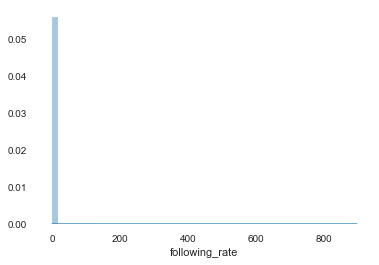

In [25]:
sns.distplot(df.following_rate)

In [26]:
df2[df2['following_rate']>500]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
221810,1,1,895.304000,2.104061,2.11950,15,0.0,0.0,0.015823,2.053797,0.385818,37.090909,81.845118,5,0.936000,1.544000,0.040000,0.312000,0.244800,0.024,0.792000,0.528,0.504000,65.558680,2
453149,1,1,563.631147,2.221777,2.28704,10,0.0,0.0,0.000000,0.115730,0.219521,9.492859,77.753672,47,6.139344,18.114754,0.385246,2.983607,3.972131,0.000,7.860656,7.000,10.967213,211.917415,3


<AxesSubplot:xlabel='max_repetitive_punc'>

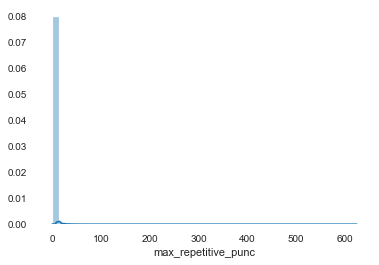

In [27]:
sns.distplot(df.max_repetitive_punc)

In [28]:
df2[df2['avgt2']>100]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
6,1,1,0.000000,0.000,0.000000,0,0.0,0.0,0.0,0.166667,0.150989,6.700000,127.402333,0,0.007874,0.078740,0.000000,0.000000,0.015748,0.070866,0.000000,0.007874,0.000000,128.200000,1
7,1,0,0.000000,0.000,0.000000,0,0.0,0.0,0.0,0.500000,0.075048,2.625000,239.236667,0,0.007874,0.047244,0.000000,0.031496,0.000000,0.000000,0.062992,0.000000,0.000000,184.781250,3
8,2,1,0.013245,0.000,0.000000,0,0.0,0.0,0.0,0.008955,0.182755,8.255385,40.811707,0,0.009934,1.096026,0.000000,0.000000,0.215232,0.195364,0.149007,0.125828,0.605960,155.562500,4
12,1,1,0.007937,0.000,0.000000,0,0.0,0.0,0.0,0.125000,0.187024,7.666667,108.577167,0,0.007937,0.047619,0.000000,0.000000,0.009524,0.000000,0.000000,0.000000,0.047619,345.333333,4
13,2,1,0.000000,0.000,0.000000,0,0.0,0.0,0.0,0.285714,0.477576,4.904762,62.528687,0,0.016000,0.144000,0.000000,0.032000,0.020800,0.000000,0.040000,0.048000,0.080000,200.875000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488865,2,1,0.008000,1.000,3.000000,0,0.0,0.0,0.0,0.076923,0.205248,8.200000,159.723875,0,0.016000,0.080000,0.000000,0.032000,0.003200,0.000000,0.064000,0.008000,0.008000,266.666667,3
488870,1,1,0.103175,1.875,2.333333,0,0.0,0.0,0.0,0.109091,0.223827,33.859155,76.140158,0,0.023810,0.404762,0.000000,0.115079,0.066667,0.000000,0.261905,0.269841,0.031746,211.411765,3
488872,2,0,0.000000,0.000,0.000000,0,0.0,0.0,0.0,0.300000,0.422837,8.714286,56.783167,0,0.008000,0.064000,0.000000,0.012000,0.006400,0.000000,0.008000,0.000000,0.048000,195.000000,1
488873,1,1,0.017241,0.000,0.000000,0,0.0,0.0,0.0,0.012195,0.668494,35.662921,69.031216,2,0.051724,2.043103,0.017241,0.301724,0.339655,0.068966,0.922414,0.137931,1.172414,188.742857,4


<AxesSubplot:xlabel='avgt2'>

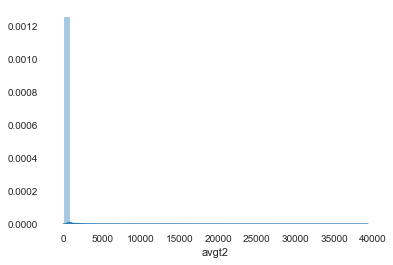

In [29]:
sns.distplot(df.avgt2)

In [30]:
df2[df2['avgTimeSpent']>10000]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
39404,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.488595,1.351500e+04,58.289000,0,0.000000,0.047619,0.000000,0.000000,0.009524,0.000000,0.015873,0.031746,0.000000,0.000000,1
46148,1,1,0.000000,0.000000,0.000000,4,0.0,0.0,0.0,1.000000,0.657202,1.607240e+04,23.048250,0,0.008197,0.032787,0.000000,0.000000,0.008197,0.000000,0.032787,0.008197,0.000000,167.000000,3
94977,3,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.540388,1.205250e+04,19.868500,0,0.000000,0.016949,0.000000,0.008475,0.000000,0.000000,0.008475,0.008475,0.000000,0.000000,1
100444,1,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.341657,2.509200e+04,83.051415,0,0.000000,0.005495,0.000000,0.002747,0.000000,0.000000,0.005495,0.000000,0.000000,0.000000,1
128511,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.321435,1.024038e+04,82.689375,0,0.000000,0.064000,0.000000,0.032000,0.000000,0.000000,0.064000,0.000000,0.000000,0.000000,1
155054,2,0,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,1.000000,3.107092e+04,229.800000,0,0.000000,0.002004,0.000000,0.000000,0.009619,0.044088,0.000000,0.000000,0.004008,0.000000,1
165305,2,1,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,0.000000,0.341657,2.775300e+04,83.051415,0,0.000000,0.007299,0.000000,0.000000,0.001460,0.000000,0.000000,0.000000,0.007299,0.000000,1
187399,1,0,0.020930,2.250000,2.500000,4,0.0,0.0,0.0,0.380000,0.078230,3.826604e+07,179.237429,1,0.010465,0.045349,0.001163,0.005814,0.016512,0.000000,0.030233,0.033721,0.030233,1766.951515,3
206090,2,1,0.053203,2.000000,2.333333,0,0.0,0.0,0.0,2.166667,1.000000,1.012125e+04,177.063000,0,0.003257,0.002172,0.000000,0.002172,0.000000,0.001086,0.003257,0.000000,0.000000,3870.611111,3
213324,2,1,0.092672,2.500000,2.666667,2,0.0,0.0,0.0,1.113208,0.399729,5.712334e+04,220.852500,4,0.004310,0.047414,0.004310,0.002155,0.009914,0.014009,0.022629,0.009698,0.007543,2038.308642,2


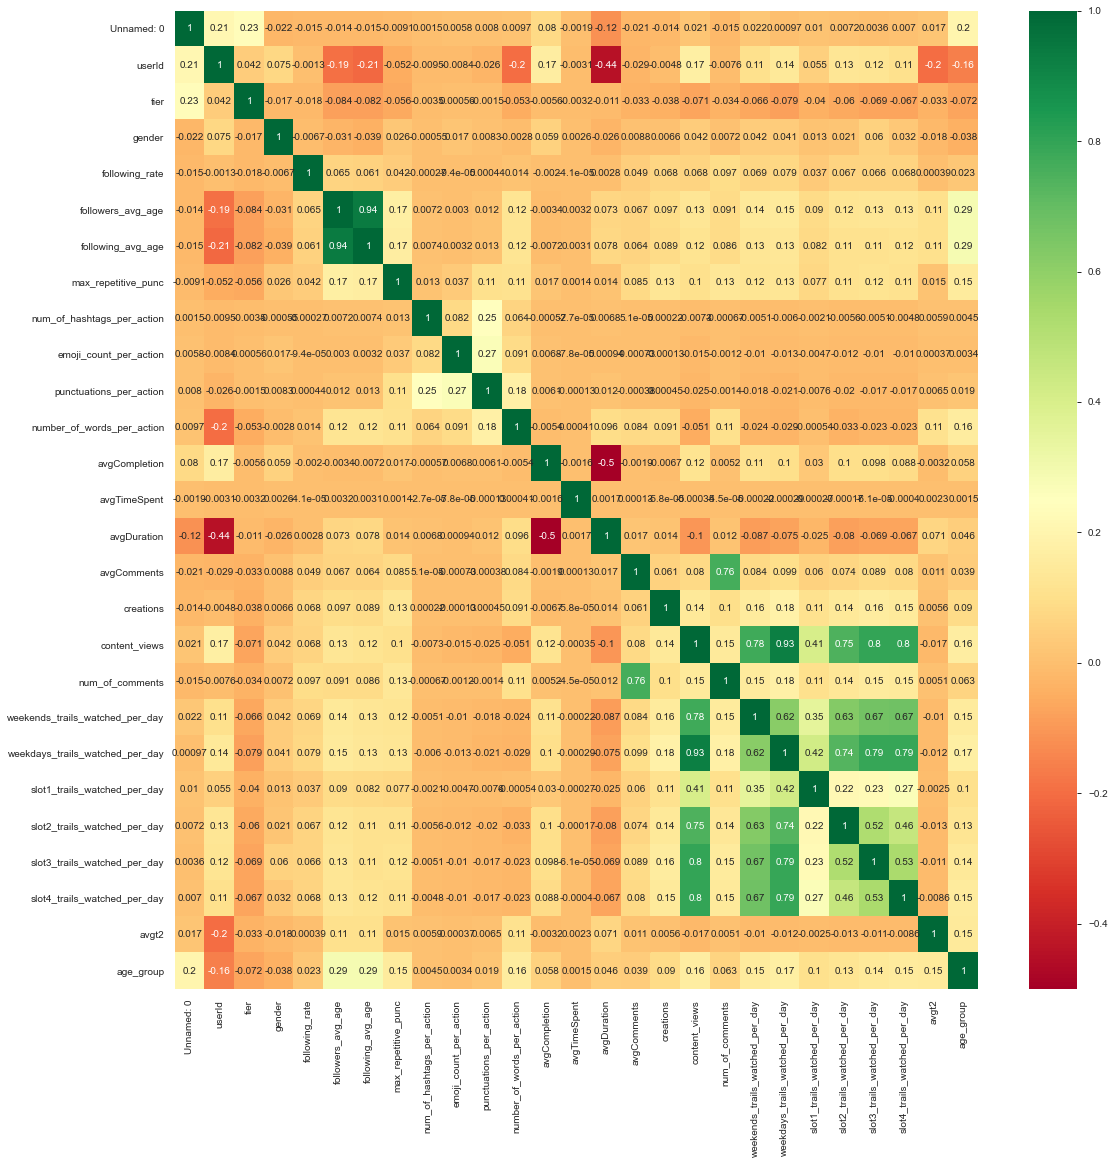

In [31]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [32]:
def correlation(dataset, threshold):
    col_corr = set()  # Set storing  all the names of correlated columns having corr more than threshold
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: ####corr value can also be negative so taking abs value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
correlation(df, 0.75)

{'following_avg_age',
 'num_of_comments',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'}

In [34]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       54320 non-null  int64  
 1   userId                           54320 non-null  int64  
 2   tier                             54320 non-null  int64  
 3   gender                           54320 non-null  int64  
 4   following_rate                   54320 non-null  float64
 5   followers_avg_age                54320 non-null  float64
 6   following_avg_age                54320 non-null  float64
 7   max_repetitive_punc              54320 non-null  int64  
 8   num_of_hashtags_per_action       54320 non-null  float64
 9   emoji_count_per_action           54320 non-null  float64
 10  punctuations_per_action          54320 non-null  float64
 11  number_of_words_per_action       54320 non-null  float64
 12  avgCompletion     

In [35]:
dft.describe()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,5.432000e+04,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,271526.164102,4.248125e+07,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,18.350892,82.572262,0.322202,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,156804.297247,1.818136e+07,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,245.222420,73.912128,4.606317,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,5.000000,3.500000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,1.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136019.250000,3.547567e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,5.651071,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,271924.000000,4.344565e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,8.500000,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,407039.750000,5.370713e+07,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,13.079052,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,543183.000000,7.904176e+07,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,48286.500000,1600.786667,549.000000,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


In [36]:
X.drop(['Unnamed: 0','userId'],inplace=True,axis=1)
dft.drop(['Unnamed: 0','userId'],inplace=True,axis=1)

In [37]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X,Y)
y_predr=rf.predict(dft)

In [38]:
y_pred=pd.DataFrame(y_predr)

In [39]:
y_pred.to_csv("1.csv")

In [40]:
classifier = XGBClassifier(random_state=0)
classifier.fit(X,Y)
y_predx1 = classifier.predict(dft)

In [41]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("2.csv",index=False)

In [42]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X,Y)
y_predd=dt.predict(dft)

In [43]:
y_pred=pd.DataFrame(y_predd)
y_pred.columns=['prediction']
y_pred.to_csv("3.csv",index=False)

In [44]:
clasn=GaussianNB()
clasn.fit(X,Y)
y_predn=clasn.predict(dft)

In [45]:
y_pred=pd.DataFrame(y_predn)
y_pred.columns=['prediction']
y_pred.to_csv("4.csv",index=False)

In [46]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [47]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [48]:
dft.head()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
0,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.033242,4.500000,120.313571,0,0.000000,0.062992,0.0,0.000000,0.012598,0.000000,0.000000,0.062992,0.000000,0.0
1,2,1,0.001818,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.051057,9.500000,188.615500,0,0.000000,0.003636,0.0,0.000000,0.000727,0.000000,0.000000,0.003636,0.000000,0.0
2,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.190984,4.675676,86.572800,0,0.000000,1.028571,0.0,0.000000,0.211429,0.000000,0.000000,0.742857,0.314286,0.0
3,2,2,0.000000,0.0,0.0,4,0.0,0.0,0.0,0.130435,0.460543,21.142857,44.439050,0,0.007937,0.166667,0.0,0.067460,0.006349,0.000000,0.111111,0.023810,0.031746,201.0
4,2,1,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.000000,0.205251,2.689655,29.136643,0,0.000000,0.233871,0.0,0.116935,0.000000,0.233871,0.000000,0.000000,0.000000,0.0


In [49]:
df2.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,0.786963,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,1.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [50]:
df2[df2['avgDuration']>5000]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
215904,3,1,0.00363,0.0,0.0,0,0.0,0.0,0.0,0.833333,0.147655,16.5,7541.026,0,0.005445,0.00363,0.0,0.00363,0.0,0.0,0.00363,0.00363,0.0,180.944444,3


<AxesSubplot:xlabel='avgDuration'>

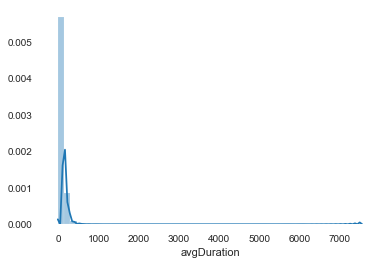

In [51]:
sns.distplot(df2['avgDuration'])

In [52]:
df2[df2['avgComments']>1000]

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
111534,1,0,0.030956,2.636364,2.187500,12,0.0,0.00000,0.00000,0.120690,0.040792,13.613953,198.985618,2234,0.006729,0.263795,3.006729,0.016151,0.051413,0.004038,0.065949,0.041723,0.177658,915.180328,2
240867,2,0,68.527559,2.103682,2.126479,5,0.0,0.00084,0.00042,4.465995,0.429610,13.381488,119.620892,1041,0.724409,9.826772,8.196850,3.358268,2.297638,1.409449,5.362205,5.456693,5.976378,138.726087,2
349436,1,0,0.053836,2.714286,2.230769,11,0.0,0.00000,0.00000,0.038153,0.110855,123.984940,197.578154,3228,0.008075,0.337820,4.344549,0.060565,0.065141,0.049798,0.033647,0.135935,0.227456,3154.625000,2


<AxesSubplot:xlabel='avgComments'>

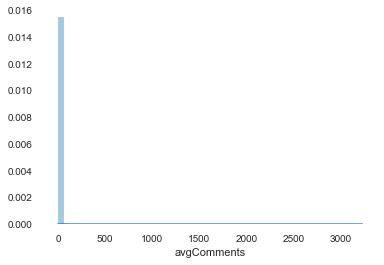

In [53]:
sns.distplot(df2['avgComments'])

<AxesSubplot:xlabel='creations'>

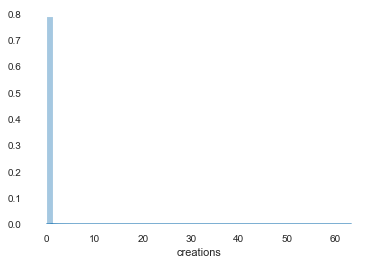

In [54]:
sns.distplot(df2['creations'])

<AxesSubplot:xlabel='content_views'>

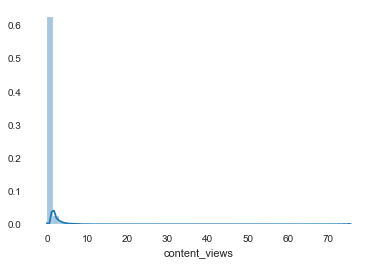

In [55]:
sns.distplot(df2['content_views'])

In [56]:
cols=['following_rate','max_repetitive_punc','number_of_words_per_action','avgComments']

In [57]:
for col in cols:
    df2[col]=np.sqrt(df2[col])

In [58]:
df2.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,0.786963,0.089448,0.347520,0.403049,0.300717,0.000277,0.000981,0.012805,0.239549,0.341582,1.087395e+02,83.104654,0.133658,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782,1.741643
std,0.430707,0.409454,0.272456,0.816334,0.925291,0.805803,0.012221,0.020381,0.159553,0.348947,0.195441,5.537516e+04,76.779586,0.550508,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886,1.088559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.092848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387535,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667,2.000000
max,3.000000,1.000000,29.921631,4.000000,4.000000,24.979992,2.333333,3.000000,27.333333,16.206994,1.000000,3.826604e+07,7541.026000,56.815491,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000,4.000000


In [59]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
df2['avgTimeSpent']=min_max_scaler.fit_transform(df2['avgTimeSpent'].values.reshape(-1,1))
df2['avgt2']=min_max_scaler.fit_transform(df2['avgt2'].values.reshape(-1,1))

In [60]:
df2.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,0.786963,0.089448,0.347520,0.403049,0.300717,0.000277,0.000981,0.012805,0.239549,0.341582,2.815538e-06,83.104654,0.133658,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,0.004192,1.741643
std,0.430707,0.409454,0.272456,0.816334,0.925291,0.805803,0.012221,0.020381,0.159553,0.348947,0.195441,1.447110e-03,76.779586,0.550508,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,0.024984,1.088559
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,0.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,1.216528e-07,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,1.959962e-07,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,1.000000
75%,2.000000,1.000000,0.092848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387535,0.460492,3.158555e-07,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,0.004546,2.000000
max,3.000000,1.000000,29.921631,4.000000,4.000000,24.979992,2.333333,3.000000,27.333333,16.206994,1.000000,1.000000e+00,7541.026000,56.815491,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,1.000000,4.000000


<AxesSubplot:xlabel='avgComments'>

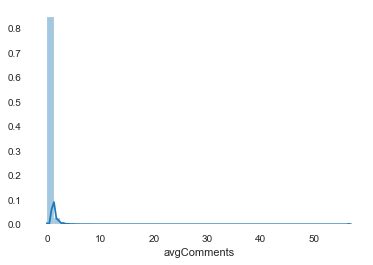

In [61]:
sns.distplot(df2['avgComments'])

In [62]:
X1=df2.drop('age_group',axis=1)
Y1=df2['age_group']

In [63]:
dft.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.976105,1.211856,0.081204,0.344033,0.397432,0.734794,0.000357,0.000909,0.012117,0.178509,0.342335,18.350892,82.572262,0.322202,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,158.286032
std,0.431142,0.408627,3.103205,0.813081,0.917988,2.822803,0.015529,0.017456,0.130576,0.600530,0.196584,245.222420,73.912128,4.606317,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,920.210984
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,1.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,5.651071,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,8.500000,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147100,0.460882,13.079052,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,178.714286
max,3.000000,2.000000,685.277778,4.000000,4.000000,130.000000,2.333333,1.692308,12.500000,65.800000,1.000000,48286.500000,1600.786667,549.000000,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,28474.333330


<AxesSubplot:xlabel='following_rate'>

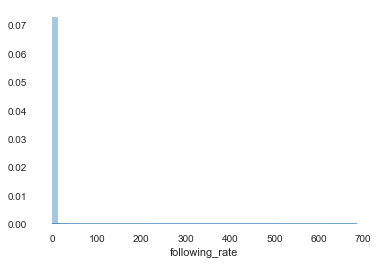

In [64]:
sns.distplot(dft['following_rate'])

<AxesSubplot:xlabel='max_repetitive_punc'>

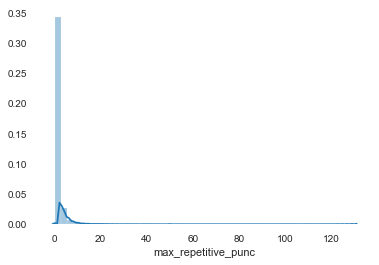

In [65]:
sns.distplot(dft['max_repetitive_punc'])

<AxesSubplot:xlabel='number_of_words_per_action'>

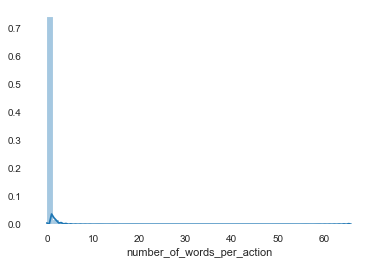

In [66]:
sns.distplot(dft['number_of_words_per_action'])

<AxesSubplot:xlabel='avgDuration'>

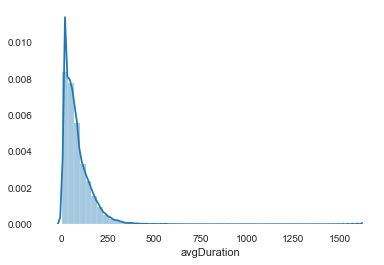

In [67]:
sns.distplot(dft['avgDuration'])

<AxesSubplot:xlabel='avgComments'>

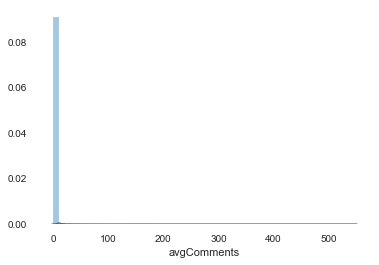

In [68]:
sns.distplot(dft['avgComments'])

In [69]:
for col in cols:
    dft[col]=np.sqrt(dft[col])

<AxesSubplot:xlabel='avgComments'>

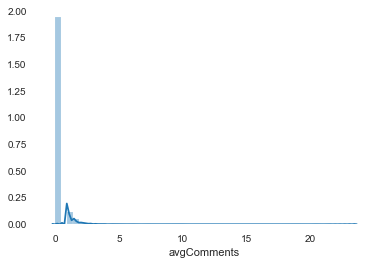

In [70]:
sns.distplot(dft['avgComments'])

In [71]:
dft['avgTimeSpent']=min_max_scaler.fit_transform(dft['avgTimeSpent'].values.reshape(-1,1))
dft['avgt2']=min_max_scaler.fit_transform(dft['avgt2'].values.reshape(-1,1))

In [72]:
dft.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000,54320.000000
mean,1.976105,1.211856,0.089198,0.344033,0.397432,0.298936,0.000357,0.000909,0.012117,0.238192,0.342335,0.000359,82.572262,0.135895,0.017718,0.393404,0.002133,0.075402,0.067343,0.032848,0.141784,0.152749,0.160141,0.005559
std,0.431142,0.408627,0.270646,0.813081,0.917988,0.803395,0.015529,0.017456,0.130576,0.348964,0.196584,0.005079,73.912128,0.551126,0.156423,0.929538,0.031136,0.212199,0.179688,0.175984,0.396400,0.481607,0.502513,0.032317
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000628,0.000000,0.767000,0.000000,0.000000,0.000873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199768,0.000096,30.447950,0.000000,0.000000,0.040816,0.000000,0.000000,0.002243,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329771,0.000155,62.443638,0.000000,0.000000,0.125000,0.000000,0.003968,0.015789,0.000000,0.011628,0.014493,0.015873,0.000000
75%,2.000000,1.000000,0.092848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383536,0.460882,0.000250,112.135575,0.000000,0.009009,0.364427,0.000000,0.060000,0.058333,0.000000,0.117647,0.117647,0.125000,0.006276
max,3.000000,2.000000,26.177811,4.000000,4.000000,11.401754,2.333333,1.692308,12.500000,8.111720,1.000000,1.000000,1600.786667,23.430749,16.915254,34.030303,4.575000,8.897959,8.672727,12.440000,17.060606,24.122449,22.096774,1.000000


In [73]:
classifier = XGBClassifier(random_state=0)
classifier.fit(X1,Y1)
y_predx1 = classifier.predict(dft)

In [74]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("5.csv",index=False)

In [75]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X1,Y1)
y_predr=rf.predict(dft)

In [76]:
y_pred=pd.DataFrame(y_predr)
y_pred.columns=['prediction']
y_pred.to_csv("6.csv",index=False)

In [77]:
y_pred

,prediction
0,1
1,1
2,1
3,2
4,1
...,...
54315,1
54316,4
54317,4
54318,1


In [78]:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100,300,500,700]}


In [79]:
rf_random = RandomizedSearchCV(estimator = classifier, param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [80]:
###rf_random.fit(X1,Y1)

In [81]:
###y_predr=rf_random.predict(dft)
###y_pred=pd.DataFrame(y_predr)
##y_pred.columns=['prediction']
##y_pred.to_csv("7.csv",index=False)####

NotFittedError: This RandomizedSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [82]:
correlation(X1, 0.7)

{'following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'}

In [83]:
X2=X1.copy()

In [84]:
X2.drop(['following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'],axis=1,inplace=True)

In [85]:
dft2=dft.copy()

In [86]:
dft2.drop(['following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'],axis=1,inplace=True)

In [87]:
X2.shape

(488877, 18)

In [88]:
dft2.shape

(54320, 18)

In [89]:
classifier.fit(X2,Y1)
y_predx1 = classifier.predict(dft2)

In [ ]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("8.csv",index=False)

In [ ]:
rf=RandomForestClassifier(random_state=0)
rf.fit(X2,Y1)
y_predr=rf.predict(dft2)

In [ ]:
y_pred=pd.DataFrame(y_predr)
y_pred.columns=['prediction']
y_pred.to_csv("9.csv",index=False)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X1, Y1)

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X1.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X2,Y1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))

In [ ]:
X3=X2.copy()

In [ ]:
X3.drop(['punctuations_per_action','avgt2','num_of_comments','gender','tier','emoji_count_per_action','avgCompletion','num_of_hashtags_per_action','avgTimeSpent'],axis=1,inplace=True)

In [ ]:
dft3=dft2.copy()

In [ ]:
dft3.drop(['punctuations_per_action','avgt2','num_of_comments','gender','tier','emoji_count_per_action','avgCompletion','num_of_hashtags_per_action','avgTimeSpent'],axis=1,inplace=True)

In [ ]:
classifier.fit(X3,Y1)
y_predx1 = classifier.predict(dft3)

In [ ]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("9.csv",index=False)

In [ ]:
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek("minority")
X_ns,y_ns=os.fit_sample(X1,Y1)
print("The number of classes before fit {}".format(Counter(Y1)))
print("The number of classes after fit {}".format(Counter(y_ns)))

In [ ]:
classifier.fit(X_ns,y_ns)
y_predx1 = classifier.predict(dft)

In [ ]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("10.csv",index=False)

In [ ]:
correlation(X1, 0.75)

In [ ]:
X4=X1.copy()

In [ ]:
X4.drop(['following_avg_age', 'weekdays_trails_watched_per_day'],axis=1,inplace=True)


In [ ]:
dft4=dft.copy()

In [ ]:
dft4.drop(['following_avg_age', 'weekdays_trails_watched_per_day'],axis=1,inplace=True)

In [ ]:
classifier.fit(X4,Y1)
y_predx1 = classifier.predict(dft4)

In [ ]:
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("11.csv",index=False)

In [ ]:
X5=X1.copy()
X5.drop(['following_avg_age',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'],axis=1,inplace=True)
dft5=dft.copy()
dft5.drop(['following_avg_age',
 'slot3_trails_watched_per_day',
 'slot4_trails_watched_per_day',
 'weekdays_trails_watched_per_day',
 'weekends_trails_watched_per_day'],axis=1,inplace=True)

In [ ]:
classifier.fit(X5,Y1)
y_predx1 = classifier.predict(dft5)
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("12.csv",index=False)

In [ ]:
correlation(X1, 0.77)

In [ ]:
selection.fit(X5, Y1)
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X5.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [ ]:
X5.drop(['gender','tier','slot1_trails_watched_per_day','avgComments','num_of_comments','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action'],axis=1,inplace=True)

In [ ]:
dft5.drop(['gender','tier','slot1_trails_watched_per_day','avgComments','num_of_comments','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action'],axis=1,inplace=True)

In [ ]:
classifier.fit(X5,Y1)
y_predx1 = classifier.predict(dft5)
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("13.csv",index=False)

In [90]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tier                             488877 non-null  int64  
 1   gender                           488877 non-null  int64  
 2   following_rate                   488877 non-null  float64
 3   followers_avg_age                488877 non-null  float64
 4   following_avg_age                488877 non-null  float64
 5   max_repetitive_punc              488877 non-null  float64
 6   num_of_hashtags_per_action       488877 non-null  float64
 7   emoji_count_per_action           488877 non-null  float64
 8   punctuations_per_action          488877 non-null  float64
 9   number_of_words_per_action       488877 non-null  float64
 10  avgCompletion                    488877 non-null  float64
 11  avgTimeSpent                     488877 non-null  float64
 12  av

In [92]:
Xn=X1.copy()

In [97]:
X.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,1.213037,0.082233,0.347520,0.403049,0.739748,0.000277,0.000981,0.012805,0.179148,0.341582,1.087395e+02,83.104654,0.320923,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,164.765782
std,0.430707,0.409454,2.467781,0.816334,0.925291,3.075954,0.012221,0.020381,0.159553,0.647588,0.195441,5.537516e+04,76.779586,7.649827,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,981.988886
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,1.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,5.655172e+00,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,8.500000e+00,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000
75%,2.000000,1.000000,0.008621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150183,0.460492,1.308654e+01,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,178.666667
max,3.000000,2.000000,895.304000,4.000000,4.000000,624.000000,2.333333,3.000000,27.333333,262.666667,1.000000,3.826604e+07,7541.026000,3228.000000,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,39304.000000


In [93]:
Xn['things_per_comm']=X1['num_of_hashtags_per_action']+X1['emoji_count_per_action']+X1['punctuations_per_action']

In [94]:
Xn['tot_vid_till_end']=X1['avgCompletion']*X1['content_views']

In [98]:
Xn['tot_com_vid']=X1['content_views']*X['avgComments']

In [99]:
Xn.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,avgDuration,avgComments,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,things_per_comm,tot_vid_till_end,tot_com_vid
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,0.786963,0.089448,0.347520,0.403049,0.300717,0.000277,0.000981,0.012805,0.239549,0.341582,2.815538e-06,83.104654,0.133658,0.017065,0.391013,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.158382,0.004192,0.014064,0.154897,0.678686
std,0.430707,0.409454,0.272456,0.816334,0.925291,0.805803,0.012221,0.020381,0.159553,0.348947,0.195441,1.447110e-03,76.779586,0.550508,0.180402,0.905303,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.502065,0.024984,0.169622,0.413029,90.154316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000653,0.000000e+00,0.233000,0.000000,0.000000,0.000887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199675,1.216528e-07,30.724000,0.000000,0.000000,0.040650,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009301,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329743,1.959962e-07,62.501164,0.000000,0.000000,0.124031,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.015873,0.000000,0.000000,0.038896,0.000000
75%,2.000000,1.000000,0.092848,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.387535,0.460492,3.158555e-07,112.246500,0.000000,0.009091,0.364486,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.122396,0.004546,0.000000,0.132421,0.000000
max,3.000000,1.000000,29.921631,4.000000,4.000000,24.979992,2.333333,3.000000,27.333333,16.206994,1.000000,1.000000e+00,7541.026000,56.815491,63.388889,75.662281,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,55.153846,1.000000,29.333333,29.292202,58411.280700


In [100]:
Xn.drop(['content_views','avgComments','avgCompletion','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action','slot4_trails_watched_per_day'],axis=1,inplace=True)

In [101]:
Xn['tot_com_vid']=min_max_scaler.fit_transform(Xn['tot_com_vid'].values.reshape(-1,1))

In [102]:
Xn.describe()

,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,number_of_words_per_action,avgTimeSpent,avgDuration,creations,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,avgt2,things_per_comm,tot_vid_till_end,tot_com_vid
count,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,4.888770e+05,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000,488877.000000
mean,1.975382,0.786963,0.089448,0.347520,0.403049,0.300717,0.239549,2.815538e-06,83.104654,0.017065,0.002009,0.074353,0.066927,0.032855,0.141705,0.150401,0.004192,0.014064,0.154897,0.000012
std,0.430707,0.409454,0.272456,0.816334,0.925291,0.805803,0.348947,1.447110e-03,76.779586,0.180402,0.030561,0.211094,0.174791,0.193962,0.402612,0.451999,0.024984,0.169622,0.413029,0.001543
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.233000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.216528e-07,30.724000,0.000000,0.000000,0.000000,0.002265,0.000000,0.000000,0.000000,0.000000,0.000000,0.009301,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.959962e-07,62.501164,0.000000,0.000000,0.003968,0.015873,0.000000,0.011834,0.014563,0.000000,0.000000,0.038896,0.000000
75%,2.000000,1.000000,0.092848,0.000000,0.000000,0.000000,0.387535,3.158555e-07,112.246500,0.009091,0.000000,0.060000,0.059016,0.000000,0.117188,0.118644,0.004546,0.000000,0.132421,0.000000
max,3.000000,1.000000,29.921631,4.000000,4.000000,24.979992,16.206994,1.000000e+00,7541.026000,63.388889,8.196850,17.201754,18.756140,19.612903,27.905983,45.083333,1.000000,29.333333,29.292202,1.000000


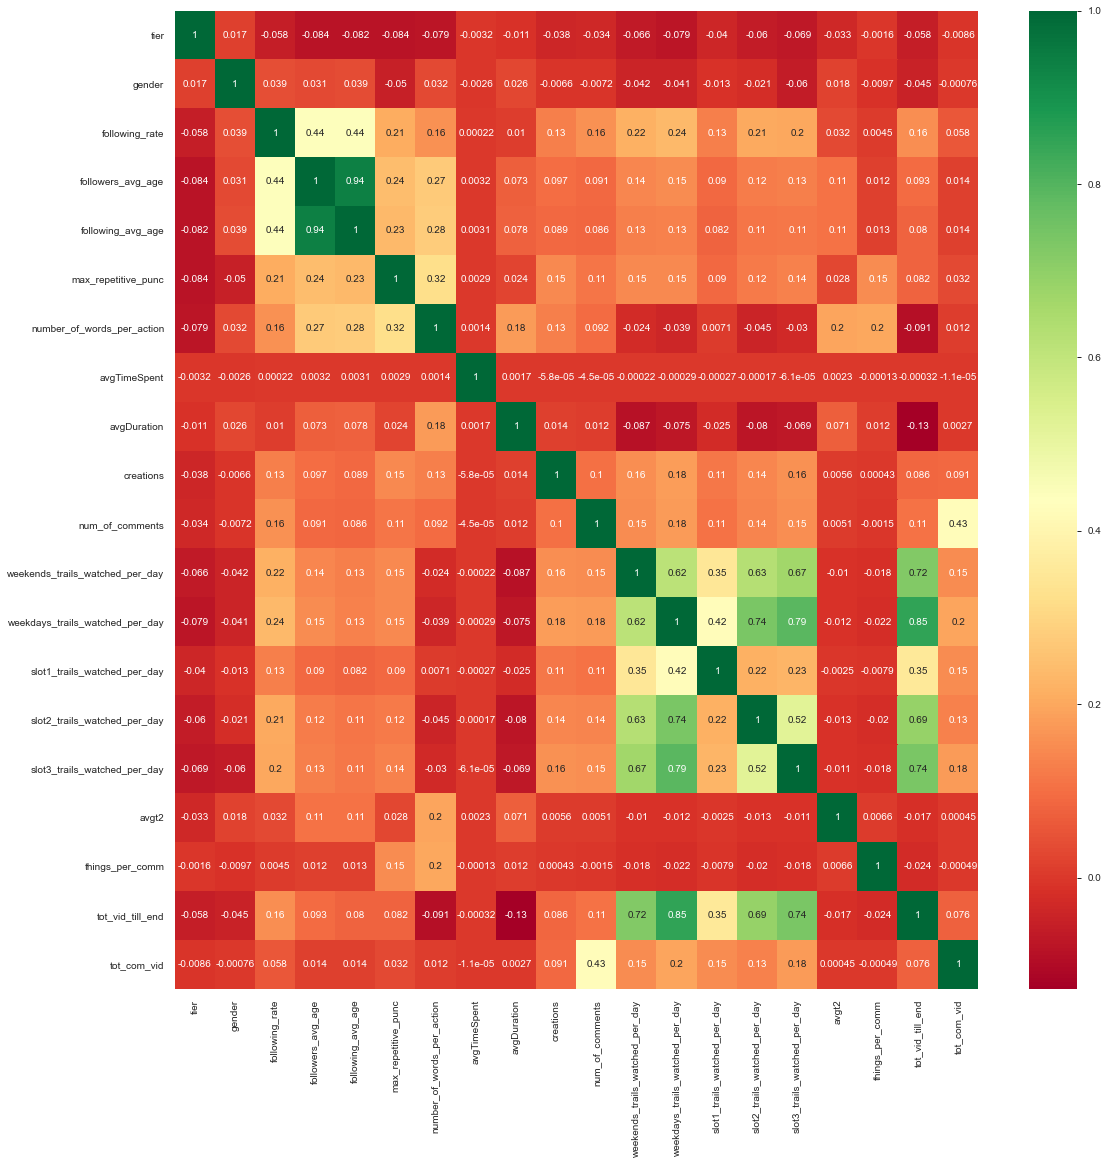

In [104]:
plt.figure(figsize = (18,18))
sns.heatmap(Xn.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [105]:
dftn=dft.copy()

In [107]:
dftn['things_per_comm']=dft['num_of_hashtags_per_action']+dft['emoji_count_per_action']+dft['punctuations_per_action']
dftn['tot_vid_till_end']=dft['avgCompletion']*dft['content_views']
dftn['tot_com_vid']=dft['content_views']*dft['avgComments']*dft['avgComments']
dftn.drop(['content_views','avgComments','avgCompletion','num_of_hashtags_per_action','emoji_count_per_action','punctuations_per_action','slot4_trails_watched_per_day'],axis=1,inplace=True)
dftn['tot_com_vid']=min_max_scaler.fit_transform(dftn['tot_com_vid'].values.reshape(-1,1))

In [108]:
classifier.fit(Xn,Y1)
y_predx1 = classifier.predict(dftn)
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("14.csv",index=False)

In [112]:
correlation(Xn,0.7)

{'following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'tot_vid_till_end'}

In [110]:
Xn1=Xn.copy()

In [113]:
Xn1.drop(['following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'tot_vid_till_end'],axis=1,inplace=True)

In [115]:
dftn1=dftn.copy()
dftn1.drop(['following_avg_age',
 'slot2_trails_watched_per_day',
 'slot3_trails_watched_per_day',
 'tot_vid_till_end'],axis=1,inplace=True)

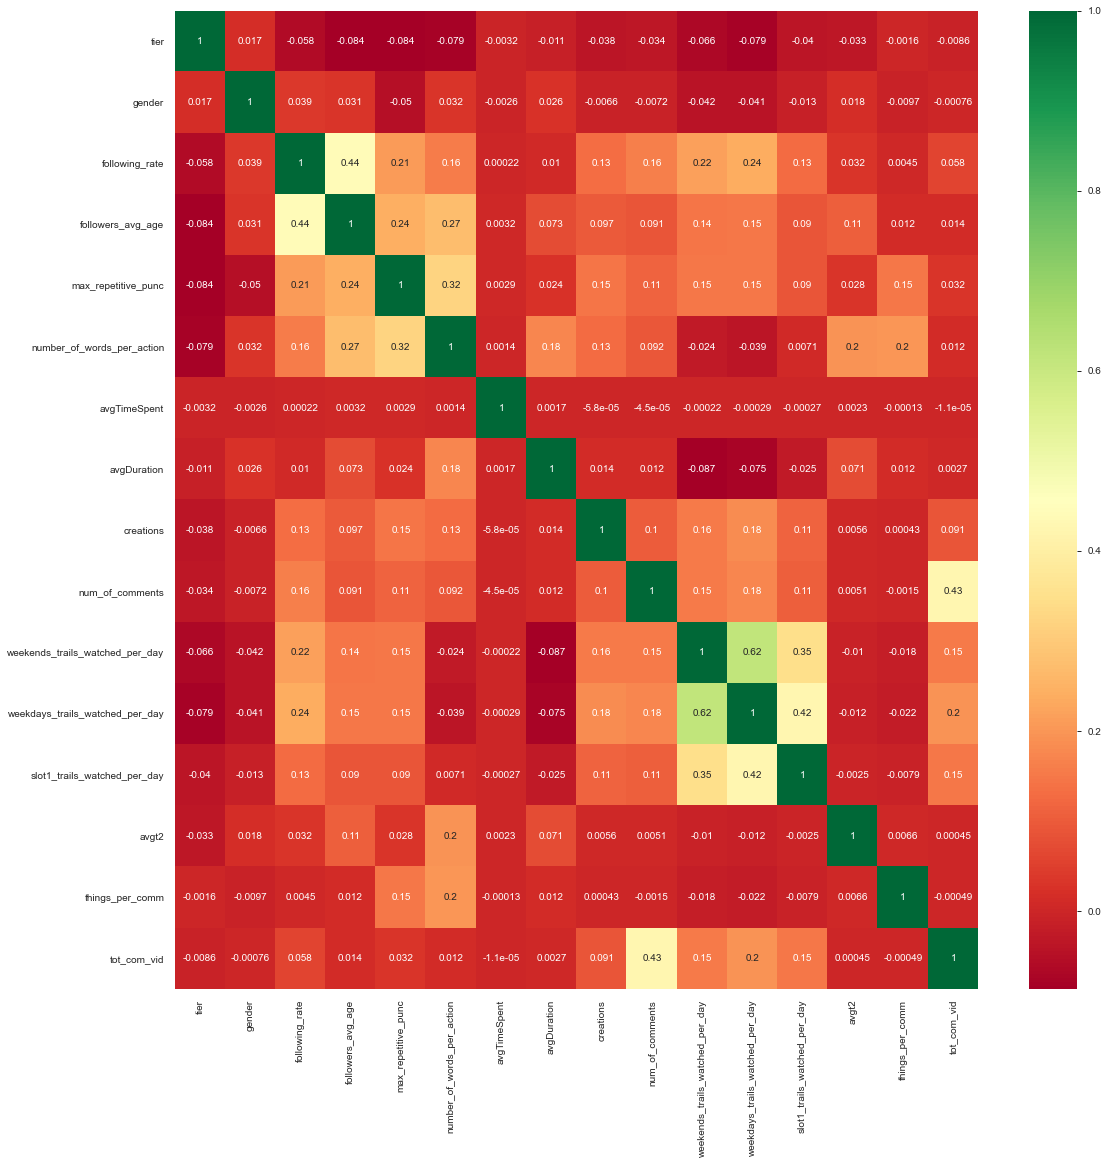

In [114]:
plt.figure(figsize = (18,18))
sns.heatmap(Xn1.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [116]:
classifier.fit(Xn1,Y1)
y_predx1 = classifier.predict(dftn1)
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("15.csv",index=False)

In [117]:
Xn.shape

(488877, 20)

In [118]:
Xn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   tier                             488877 non-null  int64  
 1   gender                           488877 non-null  int64  
 2   following_rate                   488877 non-null  float64
 3   followers_avg_age                488877 non-null  float64
 4   following_avg_age                488877 non-null  float64
 5   max_repetitive_punc              488877 non-null  float64
 6   number_of_words_per_action       488877 non-null  float64
 7   avgTimeSpent                     488877 non-null  float64
 8   avgDuration                      488877 non-null  float64
 9   creations                        488877 non-null  float64
 10  num_of_comments                  488877 non-null  float64
 11  weekends_trails_watched_per_day  488877 non-null  float64
 12  we

In [119]:
Xn['time_per_weekday']=X['avgTimeSpent']*Xn['weekdays_trails_watched_per_day']
Xn['time_per_weekend']=X['avgTimeSpent']*Xn['weekends_trails_watched_per_day']
Xn['avgvid_per_slot_per_day']=(Xn['slot1_trails_watched_per_day']+Xn['slot3_trails_watched_per_day']+Xn['slot2_trails_watched_per_day']+X['slot4_trails_watched_per_day'])/4

In [120]:
Xn.drop(['slot1_trails_watched_per_day','slot2_trails_watched_per_day','slot3_trails_watched_per_day',
        'avgTimeSpent','weekdays_trails_watched_per_day','weekends_trails_watched_per_day'],axis=1,inplace=True)

In [122]:
dftn.shape

(54320, 20)

In [123]:
dftn['time_per_weekday']=dft['avgTimeSpent']*dftn['weekdays_trails_watched_per_day']
dftn['time_per_weekend']=dft['avgTimeSpent']*dftn['weekends_trails_watched_per_day']
dftn['avgvid_per_slot_per_day']=(dftn['slot1_trails_watched_per_day']+dftn['slot3_trails_watched_per_day']+dftn['slot2_trails_watched_per_day']+dft['slot4_trails_watched_per_day'])/4

In [124]:
dftn.drop(['slot1_trails_watched_per_day','slot2_trails_watched_per_day','slot3_trails_watched_per_day',
        'avgTimeSpent','weekdays_trails_watched_per_day','weekends_trails_watched_per_day'],axis=1,inplace=True)

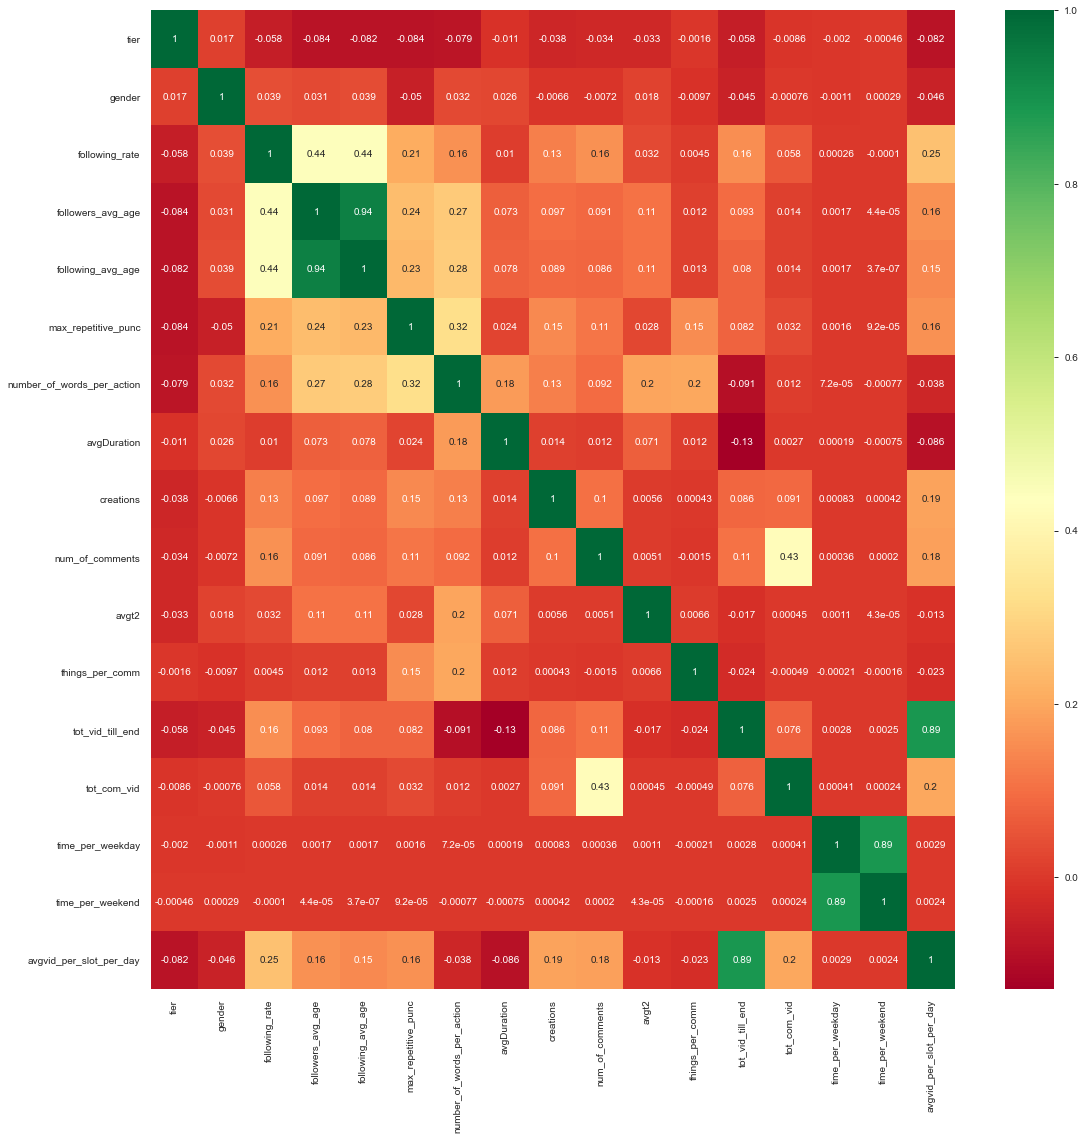

In [126]:
plt.figure(figsize = (18,18))
sns.heatmap(Xn.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [127]:
classifier.fit(Xn,Y1)
y_predx1 = classifier.predict(dftn)
y_pred=pd.DataFrame(y_predx1)
y_pred.columns=['prediction']
y_pred.to_csv("16.csv",index=False)